In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
#%pip install dash plotly pandas
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
#%pip install mlxtend
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\eduma\AppData\Local\Temp\ipykernel_138580\1511320913.py:23: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\eduma\AppData\Local\Temp\ipykernel_138580\1511320913.py:24: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Question 1:

●	Briefly describe the importance of time series forecasting models for business applications that can be used in a particular scenario and explain this by providing at least two examples.

●	Your goal is to forecast based on the use of the experimental data provided at the above-mentioned link  to create time series machine learning models for forecasting the appliances energy usage in a low energy building.

●	Use an appropriate train/test split to develop a model, and determine its forecast errors. Evaluate the performance in the context of the dataset. 


Briefly describe the importance of time series forecasting models for business applications that can be used in a particular scenario and explain this by providing at least two examples.

####################

ANSWER

Time series forecasting models are of significant importance in business for a number of reasons.

The application of demand forecasting models enables businesses to anticipate future product demand, thereby facilitating optimal inventory management and supply chain optimization. Such models assist businesses in forecasting future product demand, thereby facilitating the management of inventory and the optimisation of supply chains.

Financial planning is also facilitated by the use of time series forecasting models. Such models assist in the prediction of revenue, expenses and cash flows, which is essential for the formulation of budgets and financial plans.

The following example scenarios illustrate the potential applications of time series forecasting in various business contexts.

The retail sector employs time series forecasting to predict daily sales, thereby optimising stock levels and reducing the likelihood of overstock or stockouts.

The energy sector can also benefit from the use of time series forecasting. An energy provider utilises electricity demand forecasting in order to efficiently manage grid loads and schedule maintenance.

Your goal is to forecast based on the use of the experimental data provided at the above-mentioned link  to create time series machine learning models for forecasting the appliances energy usage in a low energy building.

Use an appropriate train/test split to develop a model, and determine its forecast errors. Evaluate the performance in the context of the dataset. 

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.head()
Springboard_color="#FCB040"

In [3]:
# The 'date' column is being converted to a datetime format in order to facilitate analysis using time series functionality.
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.shape

(19735, 29)

In [5]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

Handle missing values

In [6]:
any(df.duplicated())

False

In [7]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Conlcusion

The prevalence of 0s in the dataset indicates the absence of missing values. Therefore, no further processing of missing values is required.

The presence of the term "false" indicates that no instances of duplicate data exist.

Exploratory data analysis

Given that the target variable in the dataset is the electricity consumption of household appliances (hereafter referred to as 'Appliances'), it is plausible that other features, such as temperature, may exert an influence upon it. However, it can be reasonably assumed that there is a direct correlation between electricity consumption and time. For instance, it is reasonable to posit that electricity usage in the evening will be higher than during the day, given the typical use of lighting and the prevalence of other household activities, such as watching television. Conversely, the target variable should be at its lowest from midnight to early morning, as most people are asleep, resulting in minimal electricity usage.

Accordingly, in order to more accurately observe the distribution of the target variable over time, the following variables have been introduced.

In [8]:
df2 = df.copy()
df2

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [9]:
# Converting date into datetime
df2['date'] = df2['date'].astype('datetime64[ns]')
df2['Date'] = pd.to_datetime(df2['date']).dt.date
df2['Time'] = pd.to_datetime(df2['date']).dt.time
df2['hour'] = df2['date'].dt.hour
df2['month'] = df2['date'].dt.month
df2['day_of_week'] = df2['date'].dt.dayofweek

df2= df2.drop(["date"], axis=1)
df2

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date,Time,hour,month,day_of_week
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00,17,1,0
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00,17,1,0
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00,17,1,0
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00,17,1,0
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00,17,5,4
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00,17,5,4
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00,17,5,4
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00,17,5,4


Overview of the entire dataset.

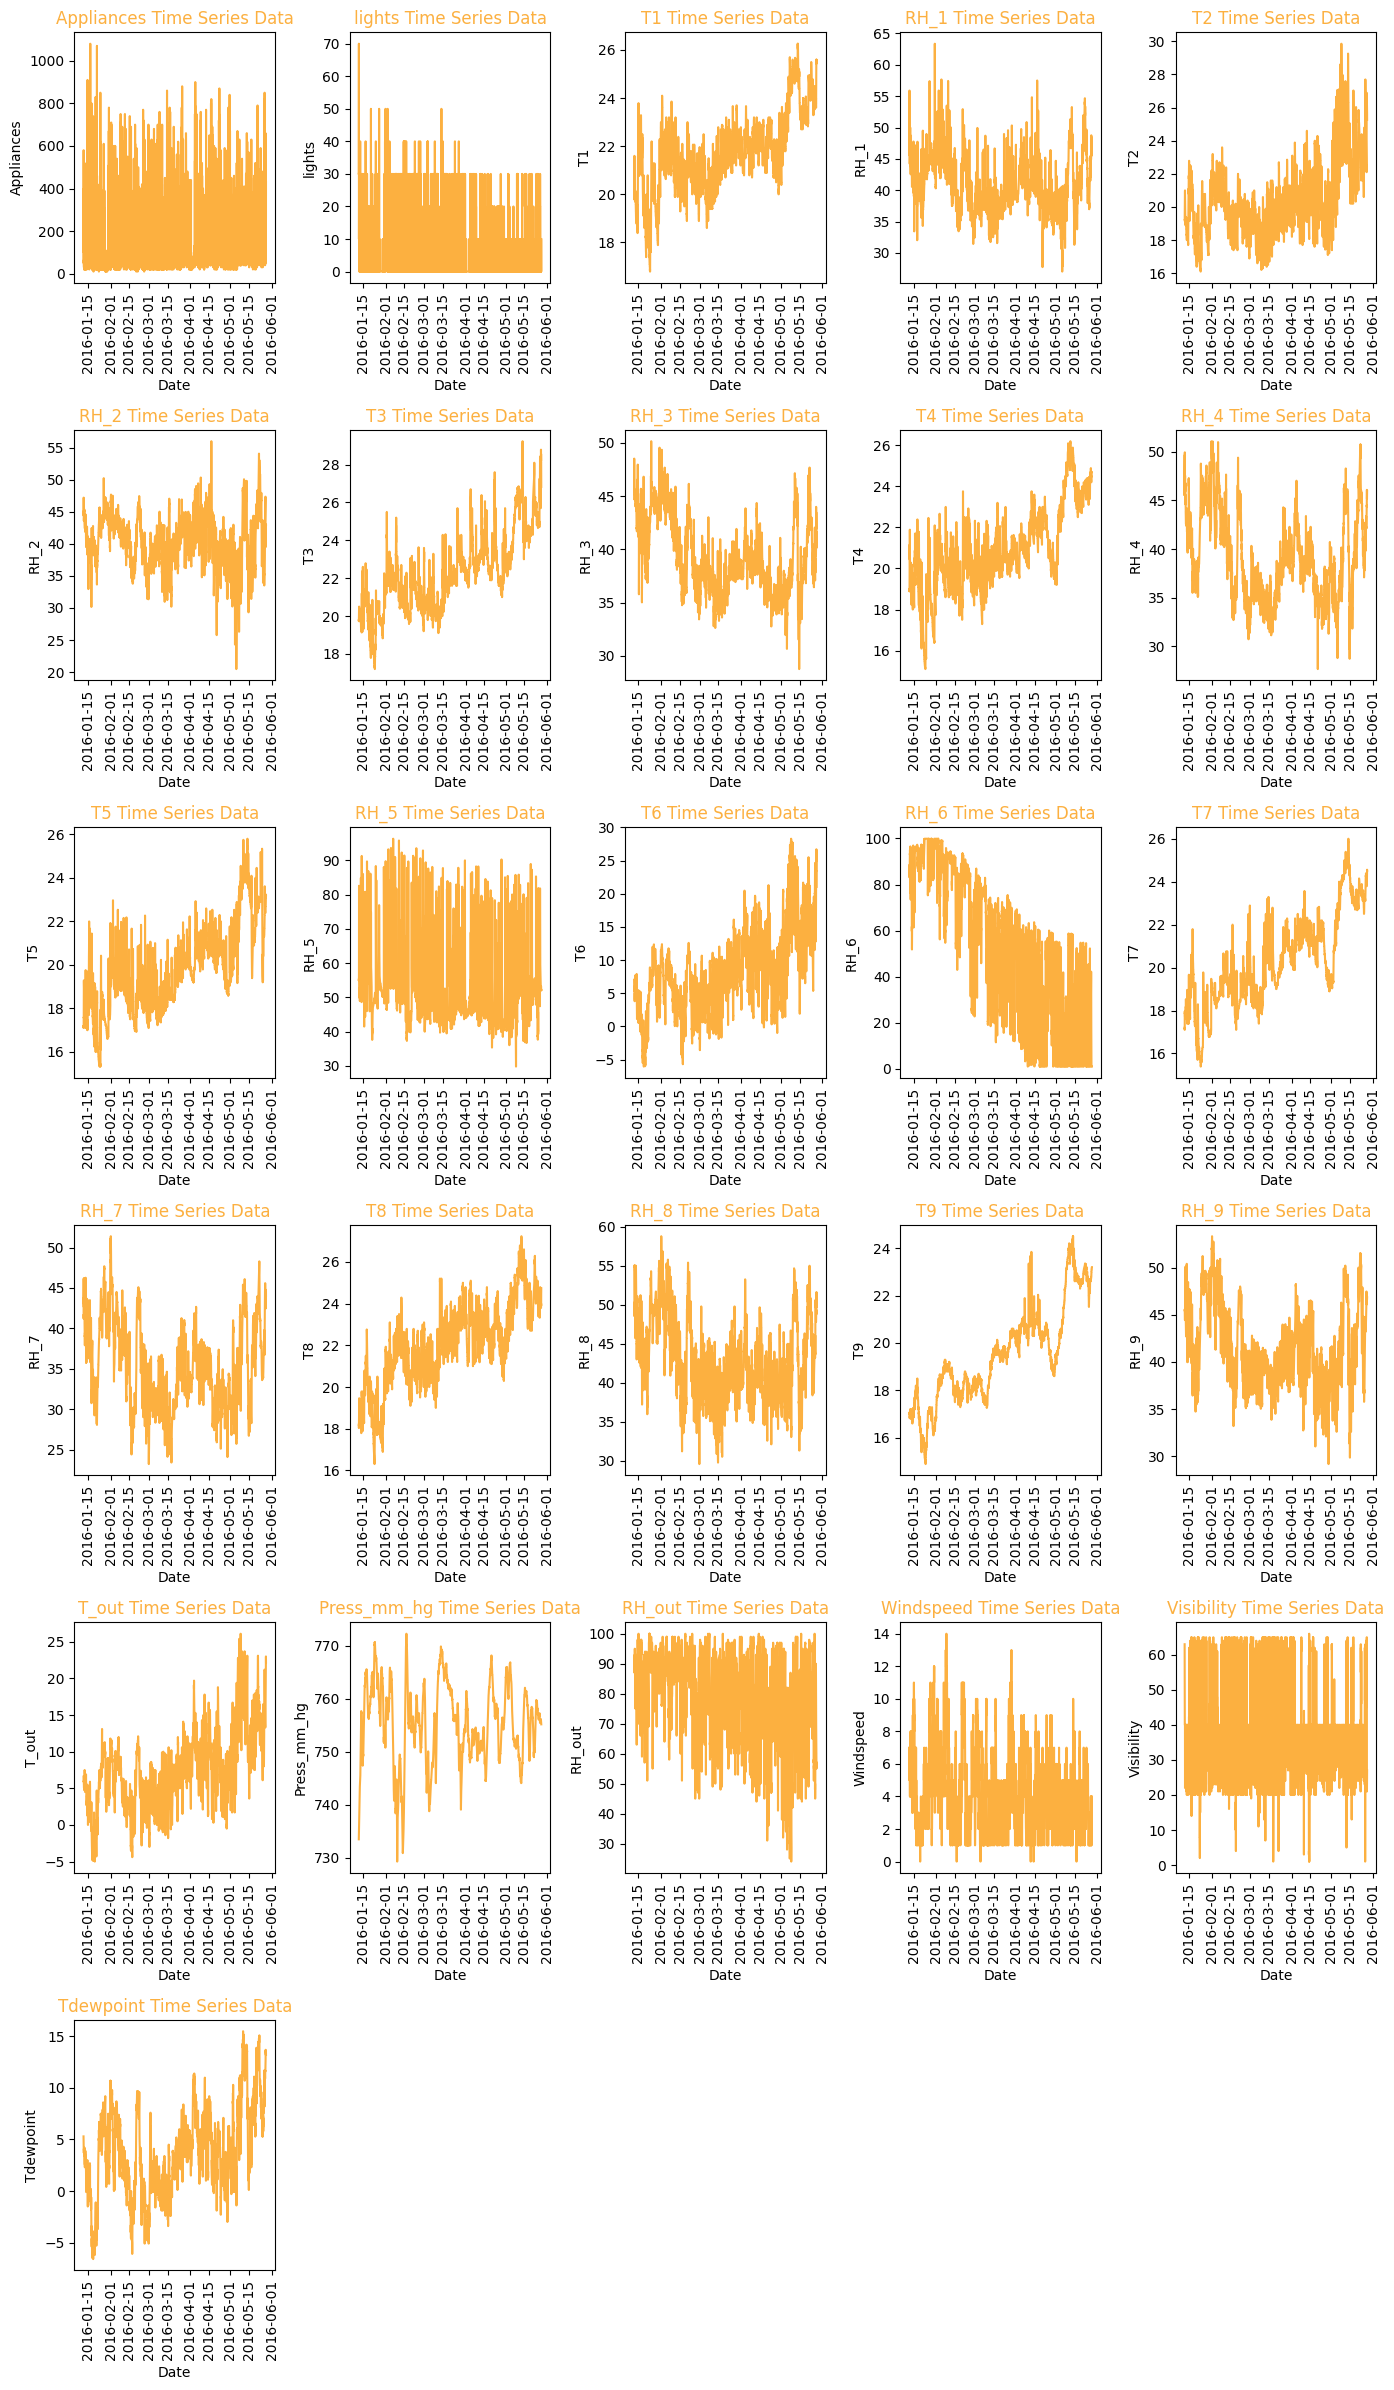

In [10]:
# Define the color for the plots
springboard_color = "#FCB040"

# Filtering columns excluding 'rv1' and 'rv2'
selected_columns = [col for col in df.columns if col not in ['rv1', 'rv2', 'date']]

# Determining the number of rows needed for the subplots
num_cols = len(selected_columns)
num_rows = (num_cols + 4) // 5  # ceil division for rows

# Creating subplots
fig, axs = plt.subplots(num_rows, 5, figsize=(14, num_rows * 4))

# Flattening the axs array for easier iteration
axs = axs.flatten()

# Looping through selected columns and plot time series on subplots
for idx, var in enumerate(selected_columns):
    sns.lineplot(data=df, x='date', y=var, ax=axs[idx], linewidth=1.5, color=springboard_color)
    axs[idx].set_xlabel('Date')
    axs[idx].set_ylabel(var)
    axs[idx].set_title(f'{var} Time Series Data', color=springboard_color)
    axs[idx].tick_params(axis='x', rotation=90)

# Turning off any unused subplots
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

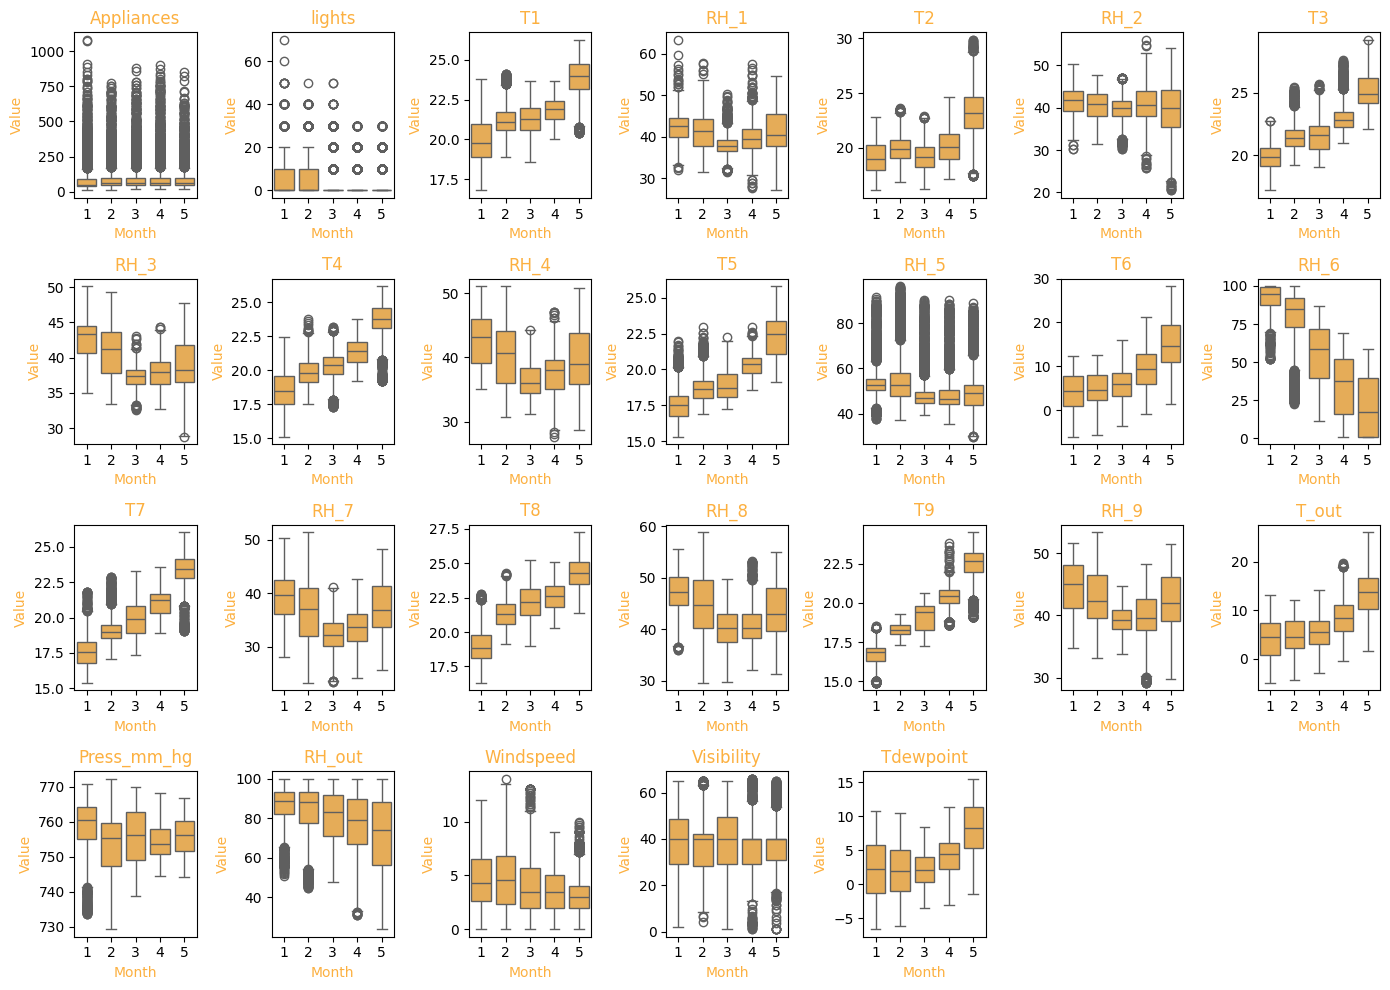

In [11]:
# Defining the color for the plots
springboard_color = "#FCB040"

# Extracting numerical columns from the data
numerical = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 
             'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 
             'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 
             'Windspeed', 'Visibility', 'Tdewpoint']

# Create subplots
fig, axs = plt.subplots(4, 7, figsize=(14, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each numerical column and plot its distribution
for i, col in enumerate(numerical):
    ax = axs[i]
    sns.boxplot(x=df['date'].dt.month, y=df[col], ax=ax, color=springboard_color)
    ax.set_title(col, color=springboard_color)
    ax.set_xlabel('Month', color=springboard_color)
    ax.set_ylabel('Value', color=springboard_color)

# Turn off any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

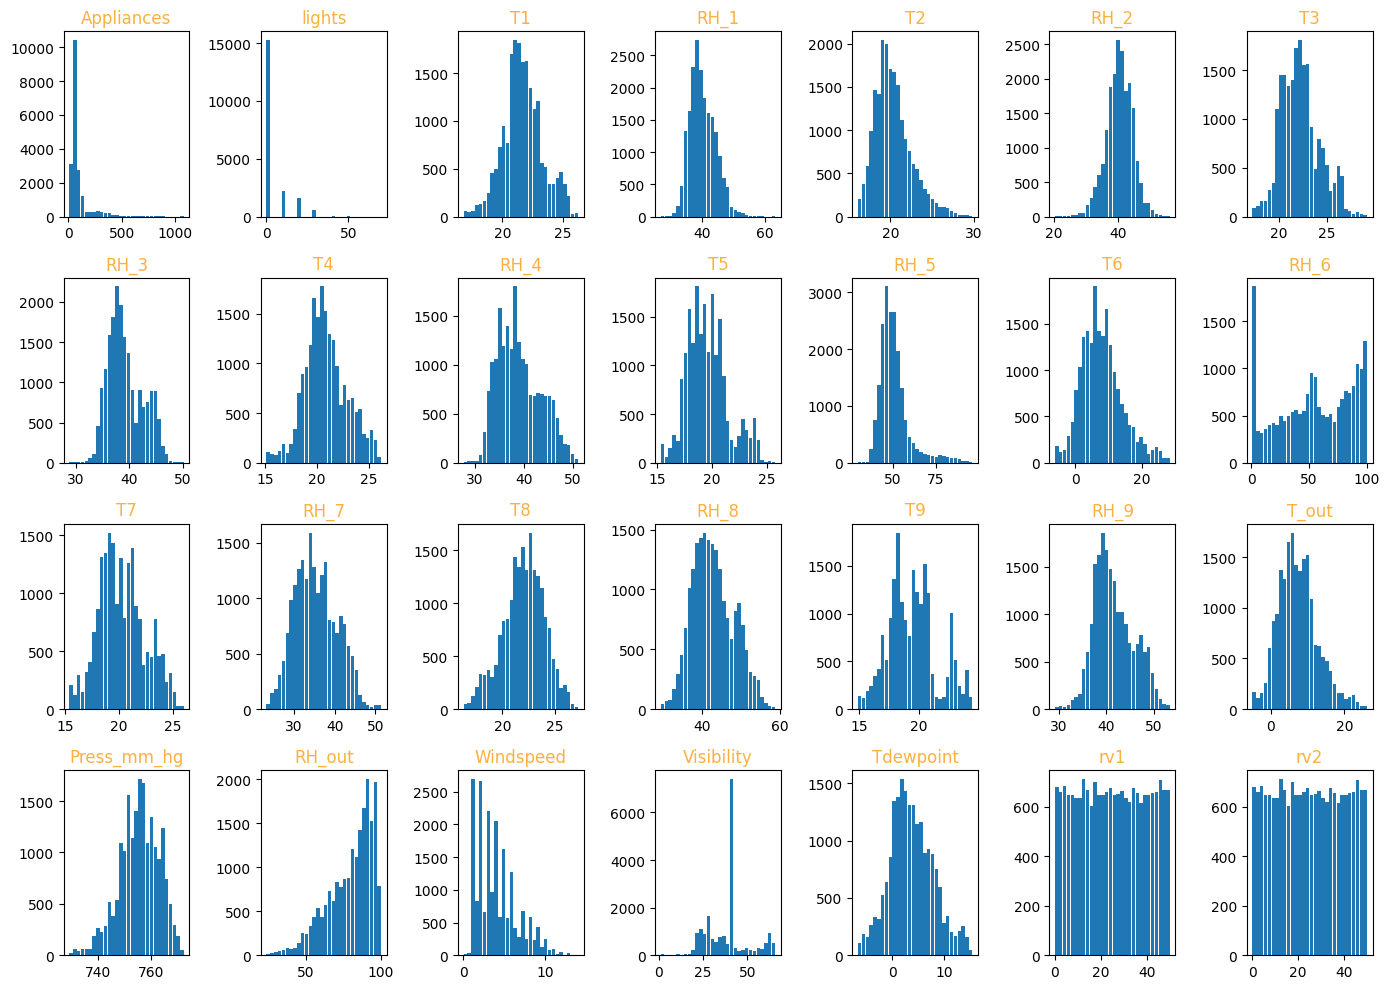

In [12]:
# Defining the color for the titles
springboard_color = "#FCB040"

# Extracting numerical columns from the data
numerical = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 
             'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 
             'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 
             'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

# Create subplots
fig, axs = plt.subplots(4, 7, figsize=(14, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each numerical column and plot its distribution
for idx, var in enumerate(numerical):
    axs[idx].hist(df[var].values, bins=30, rwidth=0.9)
    axs[idx].set_title(var, color=springboard_color)

# Turn off any unused subplots
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

It is possible to observe the shape of the distribution for each feature. For instance, certain features, such as temperature and humidity, may exhibit a normal distribution, whereas others may display a skewed or multimodal distribution.

Furthermore, it can be observed that the values RV1 and RV2 are merely random variables that have been added and could be disregarded if data other than that pertaining to 'Appliances' were to be employed.

Hourly distribution of target variable

In [13]:
# Grouping by 'hour' and sum the 'Appliances' energy consumption, then sort in descending order
hour_appliances = df2.groupby('hour')['Appliances'].sum().sort_values(ascending=False).reset_index()
hour_appliances


,hour,Appliances
0,18,156670
1,17,133600
2,19,117600
3,11,109430
4,20,104380
5,10,103060
6,13,102540
7,12,101630
8,16,98560
9,9,92710


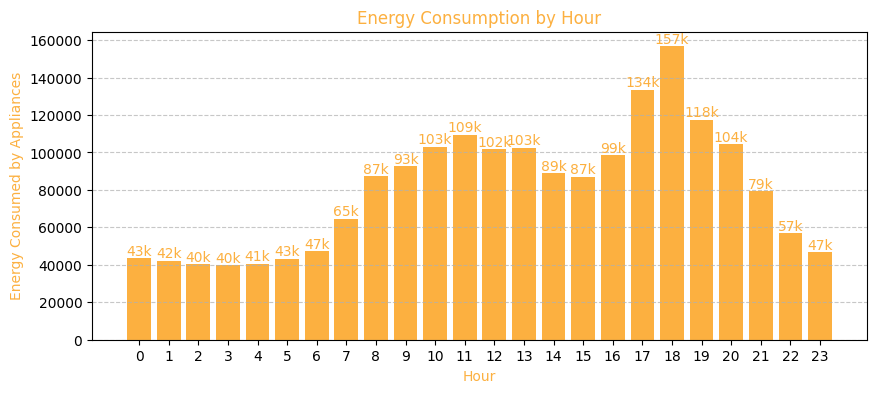

In [14]:
# Defining the color for the bars and titles
springboard_color = "#FCB040"

# Function to format the numerical value to 'k' format
def format_value(value):
    if value < 1000:
        return f"{value:.0f}"
    elif value < 10000:
        return f"{value/1000:.1f}k"
    else:
        return f"{value/1000:.0f}k"

# Sample data for plotting (Replace this with your actual data)
# hour_appliances = pd.DataFrame({'hour': range(24), 'Appliances': np.random.randint(100, 1000, size=24)})

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(hour_appliances['hour'], hour_appliances['Appliances'], color=springboard_color)  # Create a bar plot

# Adding numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom', color=springboard_color)

plt.xlabel('Hour', color=springboard_color)  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances', color=springboard_color)  # Set the y-axis label
plt.title('Energy Consumption by Hour', color=springboard_color)  # Set the title
plt.xticks(hour_appliances['hour'])  # Set the x-axis ticks to match the hours
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot

Conclusion

The graph above corroborates our hypothesis, demonstrating that electricity consumption is highest between 17:00 and 20:00, and lowest between 23:00 and 06:00 the following day. This corroborates our previous hypothesis, thereby providing further evidence of the reliability of the data.

The distribution of the target variable on weekdays

In [15]:
# Calculate and sort total energy consumed by the appliance per day of the week
app_week_day = df2.groupby('day_of_week')['Appliances'].sum().sort_values(ascending=False).reset_index()
app_week_day

,day_of_week,Appliances
0,0,309610
1,4,297650
2,5,290690
3,3,260450
4,6,259690
5,2,259000
6,1,250920


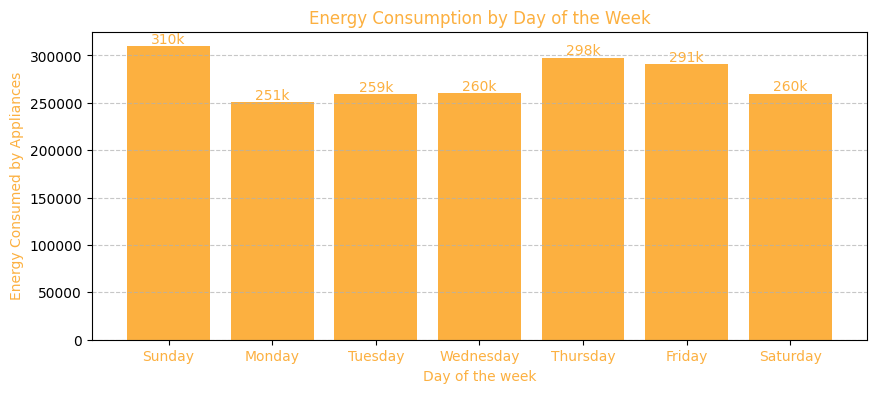

In [16]:
# Defining the color for the bars and text
springboard_color = "#FCB040"

# Dictionary to map day numbers to names
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

# Sample data for plotting (Replace this with your actual data)
# app_week_day = pd.DataFrame({'day_of_week': range(7), 'Appliances': np.random.randint(100, 1000, size=7)})

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_week_day['day_of_week'], app_week_day['Appliances'], color=springboard_color)  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom', color=springboard_color)

plt.xlabel('Day of the week', color=springboard_color)  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances', color=springboard_color)  # Set the y-axis label
plt.title('Energy Consumption by Day of the Week', color=springboard_color)  # Set the title
plt.xticks(ticks=list(day_names.keys()), labels=list(day_names.values()), color=springboard_color)  # Set x-axis ticks and labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines to the y-axis
plt.show()  # Show the plot

Conclusion

As with the analysis of the hours within a single day, it is possible that a pattern may emerge when the data from an entire week is considered. However, when the data set is split by the day of the week, no significant features emerge in the distribution of the target variable. It is noteworthy that electricity consumption on Sundays is approximately 10% higher than on other days.

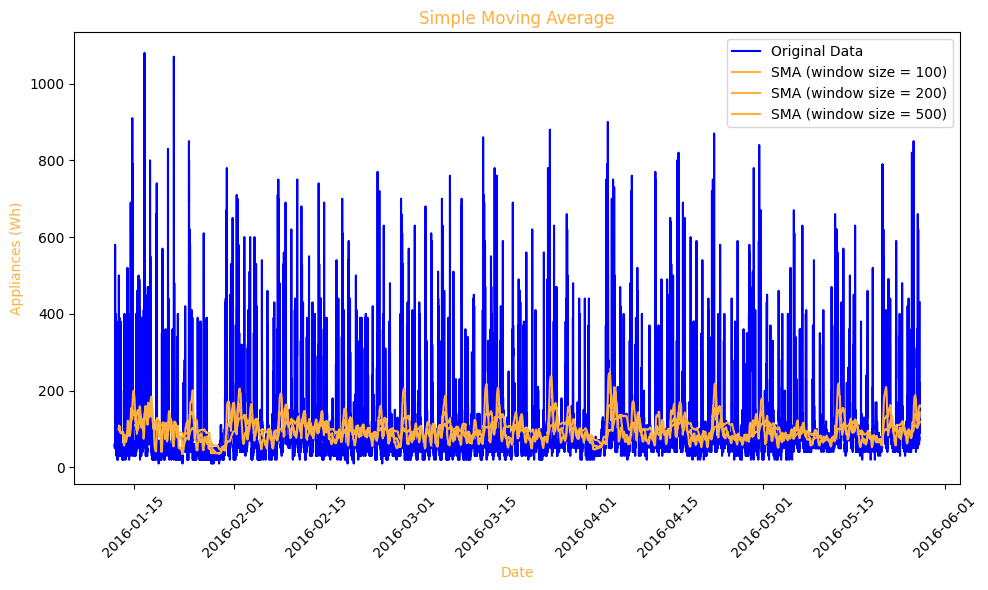

In [17]:
# Defining the color for the plots
springboard_color = "#FCB040"

# Windowing sizes for simple moving averages
window_sizes = [100, 200, 500]

# Calculating SMAs
sma = {w: df['Appliances'].rolling(window=w).mean() for w in window_sizes}

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Appliances'], label='Original Data', color='blue')

for w in window_sizes:
    plt.plot(df['date'], sma[w], label=f'SMA (window size = {w})', color=springboard_color)

plt.xlabel('Date', color=springboard_color)
plt.ylabel('Appliances (Wh)', color=springboard_color)
plt.title('Simple Moving Average', color=springboard_color)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Conclusion

There is no clear trend in the SMA plot. Appliance usage is stable with minor fluctuations.

Seasonality
The data does not show strong seasonal patterns. There are no obvious cycles or repeating patterns by time of year, month or week.

There are no unusual spikes or drops in appliance usage. The fluctuations are normal.

Correlation analysis

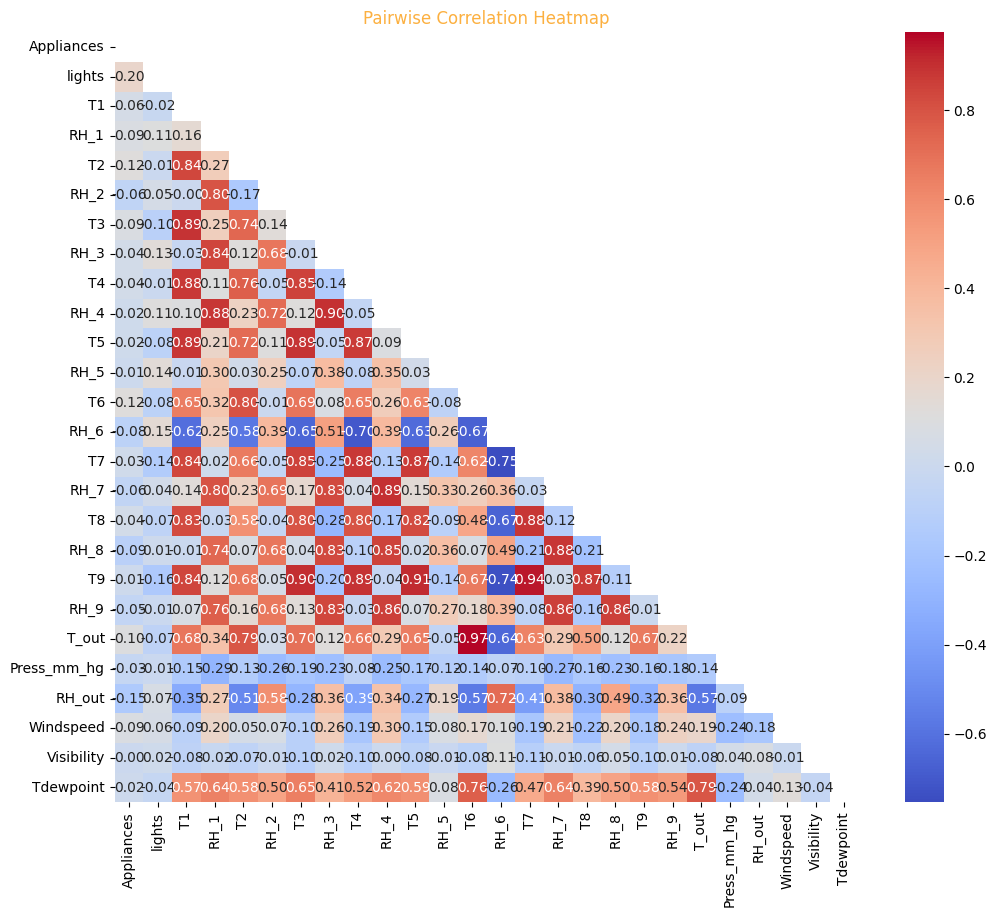

In [18]:
# Defining the color for the title
springboard_color = "#FCB040"

# Dropping irrelevant columns
df2 = df.drop(['date', 'rv1', 'rv2'], axis=1)

# Calculating pairwise correlations
corr_matrix = df2.corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Drawing the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Pairwise Correlation Heatmap', color=springboard_color)
plt.show()

Conclusion

The objective of this visual representation is to present the correlations among different features using a heatmap. The data demonstrate a robust positive correlation between temperature and humidity levels. It is notable that RH_6 (outdoor humidity) exhibits a strong negative correlation with temperatures, indicating that as temperatures increase, humidity levels decrease. 

In contrast to the observed correlations among temperatures and humidities, the correlation between our target variable, 'Appliances', and these variables appears to be insignificant.

Machine Learning Methods

ARIMA model implementing

ARIMA is generally insensitive to feature scaling, but LSTM models are sensitive to feature scaling because they are a type of RNN. Our dataset has no missing values, so imputation is not needed. This makes the modelling process smoother.

Preparing data for training a prediction model.

80/20 Split

In [19]:
# Prepare the feature set and target variable
x = df.drop(['Appliances', 'date', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'], axis=1)
y = df['Appliances']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

'Appliances', 'date', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2 are removed from the training set for the following reasons:

Appliances: This is the target variable, so it should be separated from the features.

Date: It is time-related. 

rv1 and rv2: These are random variables introduced for testing purposes, not actual features of interest.

Windspeed, Visibility, Tdewpoint: These columns are not relevant for this analysis.

Train prediction models

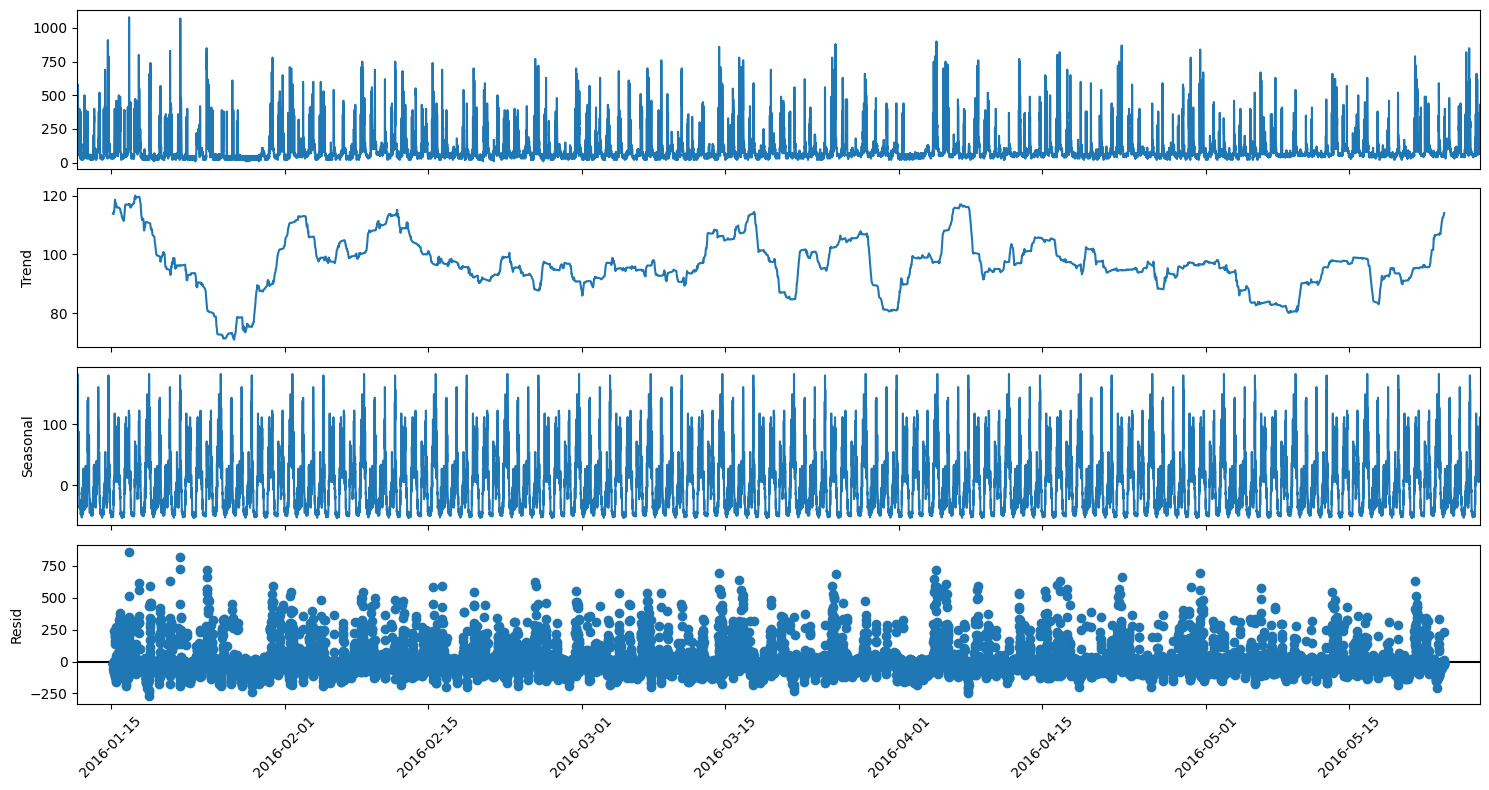

In [20]:
# Load dataset
df = pd.read_csv('energydata_complete.csv', parse_dates=['date'])

# Prepare data
data_arima = df[['Appliances', 'date']].set_index('date')

# Decompose time series
decomp_period = 6 * 24 * 7  # 1 week period, assuming data sampled every 10 minutes
result = seasonal_decompose(data_arima, period=decomp_period, model='additive')

# Plot decomposition
fig = result.plot()
fig.set_size_inches(15, 8)

# Rotate x-axis labels
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Store the result's attributes
residual = result.resid
seasonal = result.seasonal
trend = result.trend

Conclusion


ARIMA works well with linear trends and seasonality. However, the data seems to be stationary.

In [21]:


# Define ARIMA model with parameters p=3, d=0, q=3
model_AR = ARIMA(residual, order=(3, 0, 3))

# Fit the model
results_AR = model_AR.fit()

c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:

Testing prediction models

Residual predictions

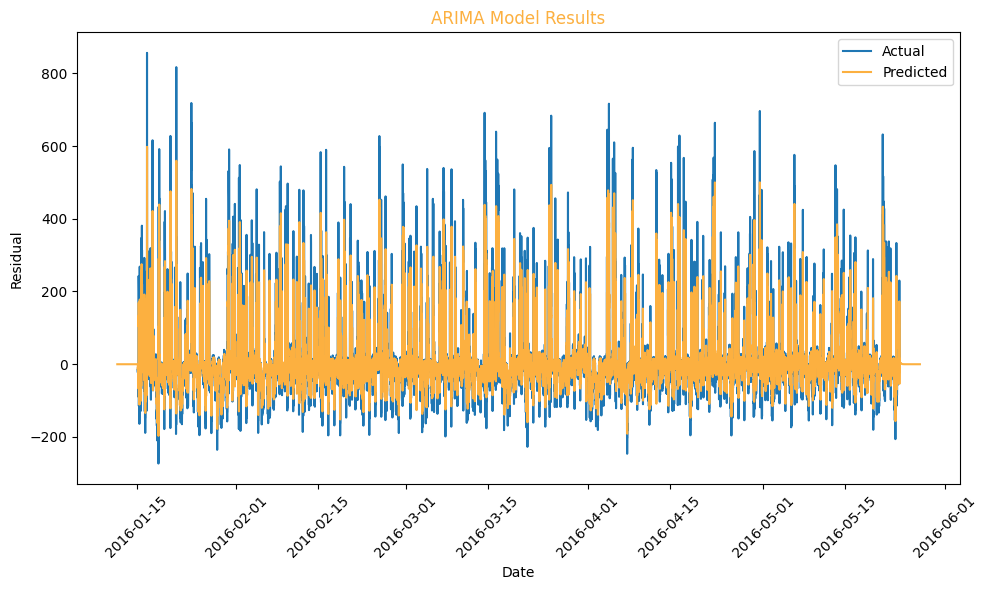

In [22]:
# Defining the color for the plots
springboard_color = "#FCB040"

# Plotting ARIMA results
plt.figure(figsize=(10, 6))  # Set the figure size

# Draw the actual residuals and predicted values
plt.plot(residual, label='Actual')
plt.plot(results_AR.fittedvalues, color=springboard_color, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend(loc="best")
plt.title('ARIMA Model Results', color=springboard_color)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

The AR model uses past data to predict future values. I have chosen the right start and end times.

In [23]:
# Choosing a later period of time to make predictions
start_time = "2016-01-15 17:00:00"
end_time = "2016-05-27 18:00:00"

# Making predictions
predictions = results_AR.predict(start=start_time, end=end_time, dynamic=False)

In [24]:
predictions

2016-01-15 17:00:00   -69.068783
2016-01-15 17:10:00   -44.970133
2016-01-15 17:20:00   -37.958415
2016-01-15 17:30:00   -59.941220
2016-01-15 17:40:00   -47.876292
                         ...    
2016-05-27 17:20:00    -0.155686
2016-05-27 17:30:00    -0.155686
2016-05-27 17:40:00    -0.155686
2016-05-27 17:50:00    -0.155686
2016-05-27 18:00:00    -0.155686
Freq: 10min, Name: predicted_mean, Length: 19159, dtype: float64

In [25]:
# Adding back trend + seasonal components to the predictions
final_predictions = predictions + trend[start_time:end_time] + seasonal[start_time:end_time]

# Checking the shape of the final predictions
print(final_predictions.shape)


(19159,)


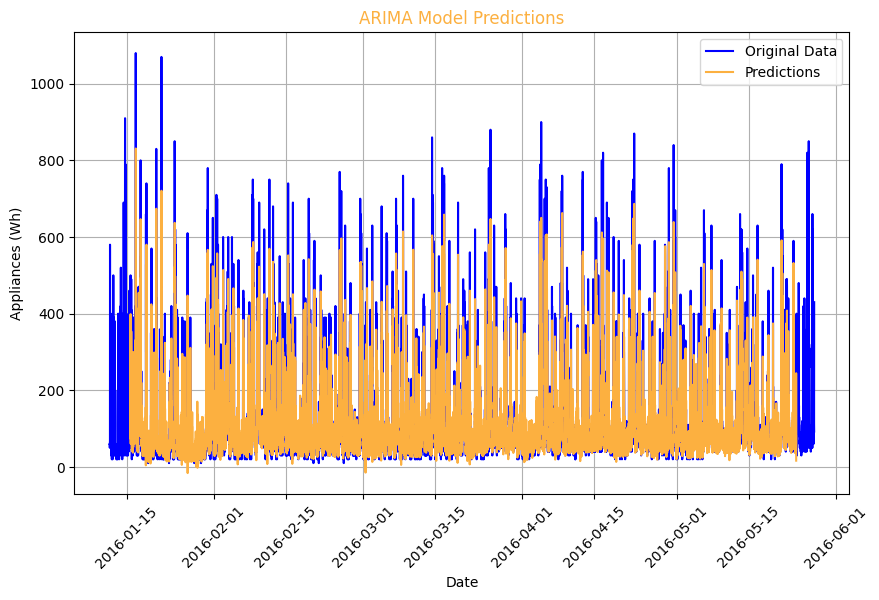

In [26]:
# Defining the color for the predictions
springboard_color = "#FCB040"

plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting original data
plt.plot(df['date'], df['Appliances'], label='Original Data', color='blue')

# Plotting predictions
plt.plot(final_predictions.index, final_predictions, color=springboard_color, label='Predictions')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.title('ARIMA Model Predictions', color=springboard_color)

# Adding legend
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines

# Showing plot
plt.show()

In [27]:
# Subset the data for the prediction period
data_subset = data_arima['Appliances'][start_time:end_time]

# Calculating MAE, RMSE, and MAPE
mae = np.mean(np.abs(data_subset - final_predictions))
rmse = np.sqrt(np.mean((data_subset - final_predictions) ** 2))
mape = np.mean(np.abs((data_subset - final_predictions) / data_subset)) * 100

# Printting the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 30.430244453539146
Root Mean Squared Error (RMSE): 62.33467043548941
Mean Absolute Percentage Error (MAPE): 31.594001370590114


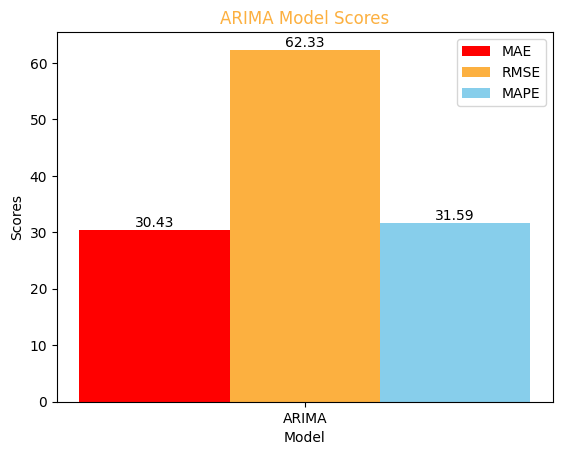

In [28]:
# Define the model
models = ['ARIMA']

# Define the scores
mae_scores = [mae]
rmse_scores = [rmse]
mape_scores = [mape]

# Define bar width
bar_width = 0.25

# Define index for the bars
index = np.arange(len(models))

# Plot the scores
plt.bar(index - bar_width, mae_scores, bar_width, label='MAE', color='red')
plt.bar(index, rmse_scores, bar_width, label='RMSE', color=springboard_color)
plt.bar(index + bar_width, mape_scores, bar_width, label='MAPE', color='skyblue')

# Add the numerical values on top of each bar
for i in range(len(models)):
    plt.text(index[i] - bar_width, mae_scores[i] + 0.01, str(round(mae_scores[i], 2)), ha='center', va='bottom')
    plt.text(index[i], rmse_scores[i] + 0.01, str(round(rmse_scores[i], 2)), ha='center', va='bottom')
    plt.text(index[i] + bar_width, mape_scores[i] + 0.01, str(round(mape_scores[i], 2)), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('ARIMA Model Scores', color=springboard_color)
plt.xticks(index, models)
plt.legend()

# Show plot
plt.show()

Conclusion

Mean Absolute Error (MAE): 30.43

The model's predictions are, on average, 30.43 units off. This is a simple way to measure how accurate a prediction is.

Root Mean Squared Error (RMSE): 62.33

This value suggests that the model makes larger errors sometimes.

Mean Absolute Percentage Error (MAPE): 31.59%

This means that the prediction errors are about 31.59% of the actual values. The model is moderately accurate.

The ARIMA model provides a reasonable prediction, but there's room for improvement.

Question 3:
Create an interactive Dashboard aimed at older adults (60+) with specific features to summarise the most important aspects of the data and communicate through your visualisation based on the results obtained from Question 1 and Question 2. 


In [29]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div(style={'fontFamily': 'Arial', 'padding': '20px'}, children=[
    html.H1('Energy Consumption Dashboard', style={'textAlign': 'center', 'color': '#FCB040'}),
    
    html.Label('Select Data Range:', style={'fontSize': '20px', 'color': '#FCB040'}),
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df['date'].min(),
        end_date=df['date'].max(),
        display_format='YYYY-MM-DD',
        style={'fontSize': '18px'}
    ),
    
    html.Label('Energy Consumption Over Time', style={'fontSize': '20px', 'color': '#FCB040'}),
    dcc.Graph(id='time-series-chart'),
    
    html.Label('Appliances Energy Consumption Distribution', style={'fontSize': '20px', 'color': '#FCB040'}),
    dcc.Graph(id='histogram-chart')
])

In [30]:
@app.callback(
    Output('time-series-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_time_series(start_date, end_date):
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    fig = px.line(filtered_df, x='date', y='Appliances', title='Energy Consumption Over Time')
    fig.update_layout(title_font_size=24, xaxis_title='Date', yaxis_title='Appliances (Wh)', 
                      title_font_color='#FCB040', font=dict(size=18), plot_bgcolor='white')
    return fig

@app.callback(
    Output('histogram-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_histogram(start_date, end_date):
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    fig = px.histogram(filtered_df, x='Appliances', title='Distribution of Energy Consumption')
    fig.update_layout(title_font_size=24, xaxis_title='Appliances (Wh)', yaxis_title='Count', 
                      title_font_color='#FCB040', font=dict(size=18), plot_bgcolor='white')
    return fig

In [31]:
if __name__ == '__main__':
    app.run_server(debug=True)

Question 4:
Explain how your dashboard is designed with the above-mentioned demographic in mind and your rationale for the types of the visualisations that you have developed in Question 3.

Question 2:

Perform Market Basket Analysis on the chosen dataset by using Apriori and FP growth algorithms. Can you express 3 similarities between these models? Address the following questions for both algorithms as mentioned below

●	Determine the top 10 most frequently purchased items based on the chosen dataset.

●	Use the Apriori algorithm to find frequent itemsets with a minimum support of 0.01.

●	Extract the association rules with a minimum confidence of 0.5.

●	Identify the top 5 association rules based on metric, lift or leverage.

●	Explain the meaning of these rules in the context of the dataset. 

● Provide an explanation of the top 5 association rules.

Compare the machine learning results obtained based on both algorithms and show the exact time used for the evaluation of the number of rules generated in both cases. Use any dataset that has not been used in the class, tutorials and previous assignments.


3 similarities between these models?

- The algorithms find frequent itemsets and extract association rules.

- They can both identify strong relationships between items in the dataset.

- You need to set a minimum support threshold to filter itemsets.

In [32]:
df = pd.read_csv('market_basket_dataset.csv')
df.head()

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [33]:
print(df.isnull().sum())

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64


In [34]:
print(df.describe())

            BillNo    Quantity       Price    CustomerID
count   500.000000  500.000000  500.000000    500.000000
mean   1247.442000    2.978000    5.617660  54229.800000
std     144.483097    1.426038    2.572919  25672.122585
min    1000.000000    1.000000    1.040000  10504.000000
25%    1120.000000    2.000000    3.570000  32823.500000
50%    1246.500000    3.000000    5.430000  53506.500000
75%    1370.000000    4.000000    7.920000  76644.250000
max    1497.000000    5.000000    9.940000  99162.000000


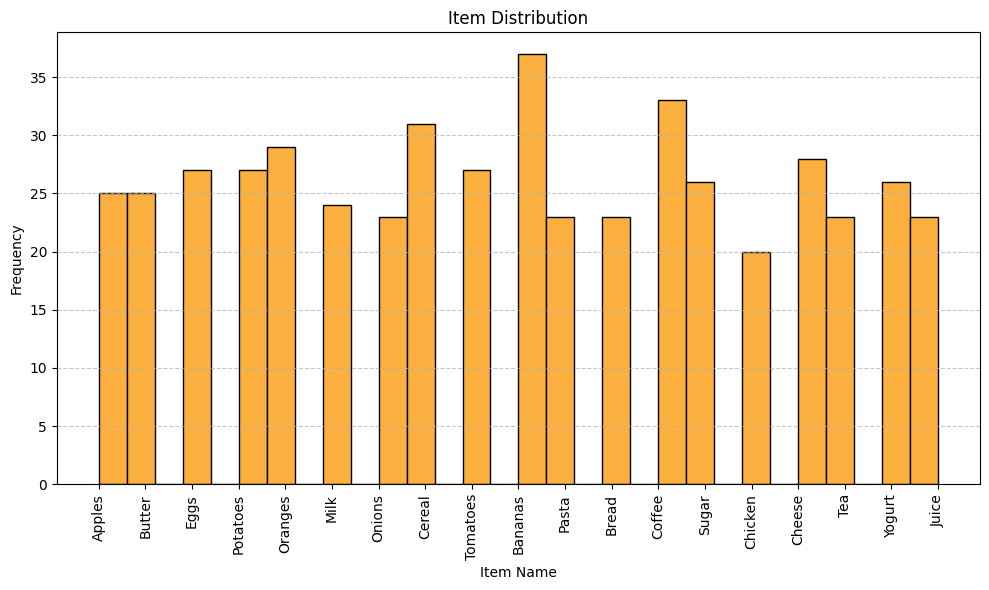

In [35]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Itemname'], bins=30, color='#FCB040', edgecolor='black')
plt.title('Item Distribution')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.tight_layout()
plt.show()

●	Determine the top 10 most frequently purchased items based on the chosen dataset.


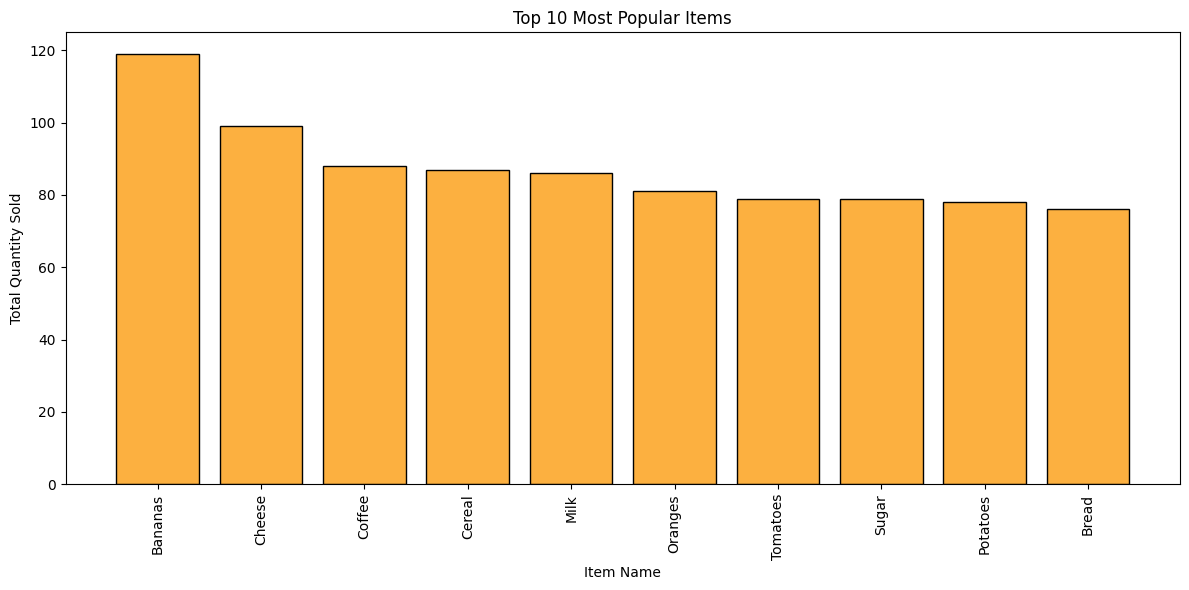

In [36]:
# Calculating item popularity
item_popularity = df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

# Plotting the top 10 most popular items
top_n = 10
top_items = item_popularity.head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_items.index, top_items.values, color='#FCB040', edgecolor='black')
plt.title(f'Top {top_n} Most Popular Items')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Displaying the plot
plt.show()

Conclusion

The top 10 items are:

- Bananas, cheese, coffee, cereal, milk, Oranges, tomatoes, sugar, potatoes,bread and  bananas are the most popular items sold at the store.


●	Use the Apriori algorithm to find frequent item sets with a minimum support of 0.01.

●	Extract the association rules with a minimum confidence of 0.5.

●	Identify the top 5 association rules based on metric, lift or leverage.

In [37]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

# Prepare the data
basket = df.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0).reset_index().set_index('BillNo')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm
frequent_itemsets_apriori = apriori(basket, min_support=0.01, use_colnames=True)

# Extract association rules from Apriori
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.5)

# Apply FP-Growth algorithm
frequent_itemsets_fpgrowth = fpgrowth(basket, min_support=0.01, use_colnames=True)

# Extract association rules from FP-Growth
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.5)

# Display the top 5 association rules based on lift for both algorithms
top_5_rules_apriori = rules_apriori.nlargest(5, 'lift')
top_5_rules_fpgrowth = rules_fpgrowth.nlargest(5, 'lift')

print("Top 5 rules from Apriori:\n", top_5_rules_apriori)
print("Top 5 rules from FP-Growth:\n", top_5_rules_fpgrowth)

C:\Users\eduma\AppData\Local\Temp\ipykernel_138580\2830436908.py:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:3805, in Index.get_loc(
    self=Index(['BillNo', 'Itemname', 'Quantity', 'Price', 'CustomerID'], dtype='object'),
    key='date'
)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
        casted_key = 'date'
        self = Index(['BillNo', 'Itemname', 'Quantity', 'Price', 'CustomerID'], dtype='object')
   3806 except KeyError as err:

File index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas\\_libs\\hashtable_class_helper.pxi:7081, in pandas._libs.hashtable.PyObjectHashTable.get_item()

File pandas\\_libs\\hashtable_class_helper.pxi:7089, in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 'date'

The above exception wa

c:\Users\eduma\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



●	Explain the meaning of these rules in the context of the dataset. 

● Provide an explanation of the top 5 association rules.

Top 5 Rules from Apriori Algorithm
Oranges, Butter, Yogurt => Bread, Eggs:
Customers who buy Oranges, Butter, and Yogurt also buy Bread and Eggs. This rule is always true in the data set. The high lift value of 76.5 shows these items are bought together much more often than by chance.

Bread and eggs => oranges, butter and yoghurt.
Similarly, customers who buy bread and eggs also buy oranges, butter and yoghurt. It has a confidence of 1.0 and a lift of 76.5, showing a strong association.

Pasta, chicken, milk => onions, apples, eggs:
This rule shows that customers who buy pasta, chicken, and milk also buy onions, apples, and eggs. The perfect confidence value of 1.0 and a lift of 76.5 show a strong relationship between these items.

Onions, pasta, apples => chicken, milk, eggs
Onions, pasta and apples are bought with chicken, milk and eggs. This rule also has a confidence of 1.0 and a high lift, showing a consistent pattern.

Pasta, apples, eggs => onions, chicken, milk
Customers who buy pasta, apples and eggs also buy onions, chicken and milk. This rule shows a strong association.

Top 5 Rules from FP-Growth Algorithm
Pasta, Eggs, Potatoes => Onions, Apples, Milk:
Pasta, eggs and potatoes customers also buy onions, apples and milk. The rule shows a strong correlation.

Pasta, Milk, Potatoes => Onions, Apples, Eggs:
This rule shows that customers who buy pasta, milk, and potatoes also buy onions, apples, and eggs. The perfect confidence value and lift show a strong association.

Pasta, milk, eggs => onions, apples, potatoes
Pasta, milk and eggs customers also buy onions, apples and potatoes. The confidence level is 1.0 and the lift is 76.5, which suggests a consistent purchasing pattern.

Onions, apples and potatoes lead to pasta, milk and eggs. The rule shows a strong relationship between these items.

Onions, apples, eggs => pasta, milk, potatoes
Customers who buy onions, apples and eggs also buy pasta, milk and potatoes. The perfect confidence value and high lift show a strong link.

Question 3:
Create an interactive Dashboard aimed at older adults (60+) with specific features to summarise the most important aspects of the data and communicate through your visualisation based on the results obtained from Question 1 and Question 2. 


In [38]:
# Preprocess the data
item_popularity = df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)
top_10_items = item_popularity.head(10)

# Prepare data for association rules (dummy example, replace with actual rules from Question 2)
rules_apriori = [
    {'antecedents': 'Oranges, Butter, Yogurt', 'consequents': 'Bread, Eggs'},
    {'antecedents': 'Bread, Eggs', 'consequents': 'Oranges, Butter, Yogurt'},
    {'antecedents': 'Pasta, Chicken, Milk', 'consequents': 'Onions, Apples, Eggs'},
    {'antecedents': 'Onions, Pasta, Apples', 'consequents': 'Chicken, Milk, Eggs'},
    {'antecedents': 'Pasta, Apples, Eggs', 'consequents': 'Onions, Chicken, Milk'}
]

In [39]:
# Initializing the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div(style={'fontFamily': 'Arial', 'padding': '20px'}, children=[
    html.H1('Market Basket Analysis Dashboard', style={'textAlign': 'center', 'color': '#FCB040'}),
    
    html.Label('Top 10 Most Popular Items', style={'fontSize': '20px', 'color': '#FCB040'}),
    dcc.Graph(id='top-10-items-chart'),
    
    html.Label('Association Rules', style={'fontSize': '20px', 'color': '#FCB040'}),
    dcc.Dropdown(
        id='association-rules-dropdown',
        options=[{'label': f"{rule['antecedents']} => {rule['consequents']}", 'value': idx} for idx, rule in enumerate(rules_apriori)],
        value=0,
        style={'fontSize': '18px'}
    ),
    html.Div(id='association-rule-details', style={'fontSize': '18px', 'color': '#FCB040'})
])

In [40]:
@app.callback(
    Output('top-10-items-chart', 'figure'),
    Input('association-rules-dropdown', 'value')
)
def update_top_10_items_chart(selected_rule):
    fig = px.bar(top_10_items, x=top_10_items.index, y=top_10_items.values, labels={'x': 'Item', 'y': 'Quantity'},
                 title='Top 10 Most Popular Items')
    fig.update_layout(title_font_size=24, xaxis_title='Item Name', yaxis_title='Total Quantity Sold',
                      title_font_color='#FCB040', font=dict(size=18), plot_bgcolor='white')
    return fig

@app.callback(
    Output('association-rule-details', 'children'),
    Input('association-rules-dropdown', 'value')
)
def display_association_rule_details(selected_rule):
    rule = rules_apriori[selected_rule]
    return html.Div([
        html.P(f"Antecedents: {rule['antecedents']}"),
        html.P(f"Consequents: {rule['consequents']}")
    ])

In [41]:
if __name__ == '__main__':
    app.run_server(debug=True)

Question 4:
Explain how your dashboard is designed with the above-mentioned demographic in mind and your rationale for the types of the visualisations that you have developed in Question 3.


Conclusion 

This dashboard is designed for older adults (60+). It is simple, clear, and easy to use.

We made the text big and used bright colours to make it easy to read. Main titles and labels are in Arial, 20px or higher. High-contrast colours make it easier for users with visual impairments to see the different sections and elements.

The layout is simple and clear. This makes it easier for users to navigate the dashboard, especially those who aren't tech-savvy.

We used a bar chart to show the 10 most popular items. Bar charts are easy to understand and show which items are the most popular. This shows which items are bought most often.

A dropdown menu shows the market basket analysis results. This menu lets users choose and view specific information without being overwhelmed. When a rule is selected, the antecedents and consequents are displayed. This text makes the information easy to understand.

Dropdown menus and clickable options are large and easy to use, even for users with limited dexterity. The dashboard shows users what they are doing and keeps them engaged.

References


Investopedia. (n.d.). Autoregressive Integrated Moving Average (ARIMA) Prediction Model. [online] Available at: https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp#:%7E:text=An%20autoregressive%20integrated%20moving%20average%2C%20or%20ARIMA%2C%20is%20a%20statistical [Accessed 28 Jul. 2024].

Brownlee, J. (2019). Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/.

Shruthi Gurudath (2020). Market Basket Analysis & Recommendation System Using Association Rules. [online] ResearchGate. Available at: https://www.researchgate.net/publication/343484851_Market_Basket_Analysis_Recommendation_System_Using_Association_Rules

Stack Overflow. (n.d.). Efficient algorithms to perform Market Basket Analysis. [online] Available at: https://stackoverflow.com/questions/73595640/efficient-algorithms-to-perform-market-basket-analysis [Accessed 12 Jul. 2024].

Kharwal, A. (2023). Market Basket Analysis: Case Study. [online] Statso. Available at: https://statso.io/market-basket-analysis-case-study/ [Accessed 19 Jul. 2024].

plotly (n.d.). Plotly Express. [online] plotly.com. Available at: https://plotly.com/python/plotly-express/.

dash.plotly.com. (n.d.). Dash in 20 Minutes Tutorial | Dash for Python Documentation | Plotly. [online] Available at: https://dash.plotly.com/tutorial.